# Twitter Sentiment Analysis

---

## 1. Business Understanding

### 1.1 Overview

In the modern digital era, social media platforms like Twitter (now X) have become powerful channels for consumers to express opinions, experiences, and emotions about brands, products, and services. These views can significantly influence purchasing decisions, brand reputation, and marketing strategies.

Manually tracking and interpreting this vast, unstructured feedback is impractical for companies. As a result, organizations increasingly turn to **Natural Language Processing (NLP)** and **machine learning models** to automatically analyze and interpret tweet sentiments.

![NLP Diagram](nlp.image.png)
*Figure 1: Illustration of how Natural Language Processing (NLP) processes and classifies text to produce outputs.*

---

### 1.2 Business Problem

Businesses need to understand **how customers feel** about their products and brands in real time. However, the sheer volume and unstructured nature of tweets make manual analysis impossible.

The core challenge is to **automatically classify each tweet** as **positive**, **negative**, or **neutral**. This provides actionable insights to:

- Identify emerging trends in customer satisfaction or dissatisfaction.
- Track public reactions to product launches or campaigns.
- Inform data-driven marketing and customer engagement decisions.

---

### 1.3 Project Objective

**Main Objective:**  
To **develop an automated sentiment classification model** that accurately analyzes and categorizes sentiments expressed in posts on **X (formerly Twitter)** as **positive, negative, or neutral**, enabling real-time insights into customer perceptions of a brand to support **data-driven marketing** and **brand management decisions**.

**Specific Objectives:**  

1. **Build a Binary Classification Model:**  
   Develop and train a machine learning model to accurately distinguish between **positive** and **negative** sentiments in X posts.  

2. **Extend to Multiclass Classification:**  
   Enhance the model to classify posts into **three categories**:  
   - No emotion toward brand or product (Neutral)
   - Positive emotion  
   - Negative emotion  
   This should be done **while maintaining or improving overall classification performance**.

3. **Support Business Decision-Making:**  
   Deliver **interpretable sentiment insights** to marketing teams and brand managers to:  
   - Optimize campaigns  
   - Address customer concerns  
   - Enhance brand reputation  

---

### 1.4 Business Value

An accurate sentiment analysis system delivers substantial value to decision-makers by enabling:

- **Brand Monitoring**: Track customer feelings about the brand over time.  
- **Marketing Optimization**: Pinpoint campaigns that drive positive engagement or negative feedback.  
- **Customer Insights**: Uncover pain points or drivers of satisfaction.  
- **Faster Decision-Making**: Provide near real-time feedback analysis.  

---

### 1.5 Research Questions

1. **How do customers feel about the company’s products or services**, based on sentiments expressed on Twitter?  
2. **What key factors or topics drive positive and negative sentiments** toward the brand on Twitter?  
3. **How can Twitter sentiment insights support business decisions**, such as marketing strategies, customer engagement, and brand reputation management?

---

### 1.6 Success Criteria

The project's success will be measured by:

1. **Actionable Insights**: The system delivers meaningful customer opinion trends on Twitter, supporting data-driven decisions.  
2. **Brand Reputation Tracking**: Enables real-time monitoring of public sentiment, allowing timely responses to issues.  
3. **Marketing and Engagement Impact**: Insights improve strategies, engagement, and brand perception based on identified trends.


___
## 2. Data Understanding  

### 2.1 Overview  
The dataset used in this project is the **Brands and Products Emotions** dataset, obtained from **data.world** ([source link](https://data.world/crowdflower/brands-and-product-emotions)). It contains tweets evaluated for emotional content directed toward various products and brands.  

**Dataset characteristics:**  
- **Rows:** 9,093  
- **Columns:** 3  
- **Target variable:** `is_there_an_emotion_directed_at_a_brand_or_product`  
- **Feature variables:**  
  - `emotion_in_tweet_is_directed_at` – indicates the brand or product the emotion is directed toward  
  - `tweet_text` – contains the actual text of the tweet  

---

### 2.2 Target Variable Distribution  
**Observations:**  
- A significant portion of tweets **do not express a clear sentiment** toward a brand or product.  
- The dataset is **imbalanced**, with some emotion categories (e.g., negative) being underrepresented.  
- Tweets labeled **“I can’t tell”** are ambiguous and may be excluded during data cleaning.  
- Depending on the modeling goal, this can be framed as either:  
  - **Binary classification:** Positive vs. Negative  
  - **Multiclass classification:** Positive, Negative, Neutral, etc.  

---

### 2.3 Brand / Product Distribution  
Tweets in the dataset reference multiple brands and their associated products, such as:  
- **Apple:** iPhone, iPad, iPad or iPhone App, Other Apple product or service  
- **Google:** Google, Android, Android App, Other Google product or service  

**Observations:**  
- Multiple product names represent the same brand (e.g., iPhone and iPad → Apple).  
- Apple and Google dominate the dataset, making them suitable for comparative analysis.  
- Smaller product categories may be aggregated under their parent brands for consistency during preprocessing.  

---

### 2.4 Text Characteristics  
- Tweet lengths range from very short to long, reflecting natural user variability.  
- Texts contain **noisy elements** such as:  
  - Mentions (`@username`)  
  - Hashtags (`#keyword`)  
  - URLs, emojis, and punctuation  
- These artifacts require **text preprocessing** steps such as removal of special characters, tokenization, and lemmatization before modeling.  

---

### 2.5 Key Insights  
1. The dataset is sufficiently large for building a sentiment classification model.  
2. **Imbalanced sentiment distribution** warrants use of metrics like **F1-score** or **ROC-AUC** instead of accuracy alone.  
3. Text cleaning and normalization are crucial due to noise, abbreviations, and inconsistent brand mentions.  


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', module='pandas')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeremy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jeremy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jeremy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load the data
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="ISO-8859-1")
df.head(7)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product


In [3]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
# check the shape of dataset
df.shape

(9093, 3)

In [5]:
# check for nall values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
# check the unique values in "emotion_in_tweet_is_directed_at" column
df["emotion_in_tweet_is_directed_at"].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [7]:
# check the unique values in "is_there_an_emotion_directed_at_a_brand_or_product" column
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [8]:
# confirm that there are no NaNs
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

22

# 3.DATA PREPARATION

## 1. Data Cleaning
- **Filtered Data:** Kept only tweets with clear emotions (‘Positive emotion’, ‘Negative emotion’)
- **Dropped Column:** `emotion_in_tweet_is_directed_at`
- **Duplicates:** Removed previously (22 duplicates)
- **Resulting Data Shape:** (number of records after filtering)

## 2. Text Preprocessing
Applied NLTK-based cleaning function:
- Converted text to lowercase  
- Removed URLs, mentions, hashtags, numbers, and punctuation  
- Tokenized text and removed stopwords  
- Lemmatized words using WordNetLemmatizer  
- Created new column: `clean_text`

## 3. Label Encoding
Mapped sentiment labels:
- Positive emotion → 1  
- Negative emotion → 0  
Created new column: `label`

## 4. Data Splitting
- Split data into **Train (80%)** and **Test (20%)** sets  
- Used `stratify=y` to preserve class balance  

## 5. Feature Engineering (Text to Numeric)
- Used **TF-IDF Vectorizer** with:
  - `max_features=5000`
  - `ngram_range=(1,2)`  
- Transformed text data into numeric feature matrix for model input.

## 6. Handling Class Imbalance
- Applied **SMOTE (Synthetic Minority Oversampling Technique)** on training data  
- Balanced positive and negative samples for fair model training.

---

*Output:* Cleaned, vectorized, and balanced dataset ready for the **Modeling Phase**.

---


### 3.2 Handling missing values and Duplicates
Drop columns with more than 50% missing values and drop the duplicates.

In [10]:
#dropping the duplicates
df.drop_duplicates(inplace=True)
#confirming that indeed they are dropped
df.duplicated().sum()

0

In [11]:
#Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Filter columns with more than 50% missing values
missing_greater_than_50 = missing_percentage[missing_percentage > 50]

# Display them
missing_greater_than_50

emotion_in_tweet_is_directed_at    63.818763
dtype: float64

In [12]:
#dropping the 'emotion_in_tweet_is_directed_at ' column
df=df.drop(columns=['emotion_in_tweet_is_directed_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9070 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  9071 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [13]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [14]:
#checking the remaining missing values
df.isna().sum()

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

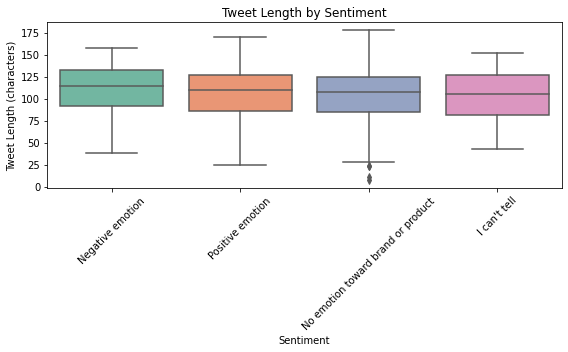

In [15]:
# assuming your dataframe is called df
df['tweet_text'].fillna('Unknown', inplace=True)

# create a new column for tweet length
df['tweet_length'] = df['tweet_text'].apply(len)

# plotting tweet length by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='is_there_an_emotion_directed_at_a_brand_or_product',
    y='tweet_length',
    data=df,
    palette='Set2'
)

plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Initializing lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if t not in self.stop_words or t in {'not','no','never'}]
        tokens = [self.lemmatizer.lemmatize(t) for t in tokens]
        return ' '.join(tokens)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.clean_text)

In [17]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131


Tweets expressing positive or neutral emotions tend to be slightly longer than negative ones, suggesting that users with positive feedback often provide more context or details in their messages.

In [18]:
# Binary target
df['binary_target'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 1,
    'Negative emotion': 0
})

# Multiclass target (example mapping)
df['multiclass_target'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    'I can’t tell': 'uncertain'
})

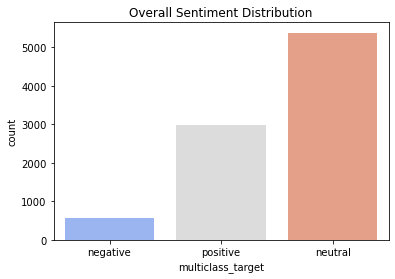

In [19]:
sns.countplot(x='multiclass_target', data=df, palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.show()

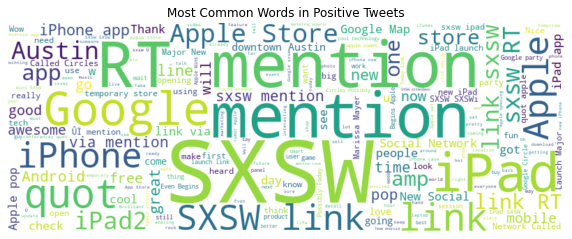

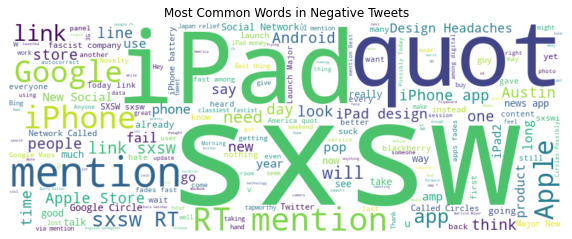

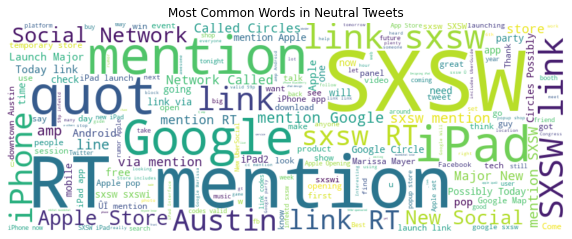

In [20]:
#Generate word clouds for each sentiment
sentiments = ['positive', 'negative', 'neutral']

for sentiment in sentiments:
    text = " ".join(df[df['multiclass_target'] == sentiment]['tweet_text'].astype(str))
    
    # create the WordCloud instance correctly and generate from text
    wordcloud = WordCloud(
        width=800, 
        height=300, 
        background_color='white',
        colormap='viridis'
    ).generate_from_text(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Common Words in {sentiment.capitalize()} Tweets")
    plt.show()

In [21]:
wordcloud = WordCloud(
        width=800, 
        height=300, 
        background_color='white',
        colormap='viridis'
    ).generate(text)

In [22]:
#Keeping only rows that have binary labels
bin_data = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]

# Droping any possible NaNs
bin_data = bin_data.dropna(subset=['binary_target'])

# target and feature
X = bin_data['tweet_text']
y = bin_data['binary_target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
# Droping Nans
multi_data = df.dropna(subset=['multiclass_target'])

#Features and target
X_multi = multi_data['tweet_text']
y_multi = multi_data['multiclass_target']

# Train test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, stratify=y_multi, random_state=42
)

In [24]:
base_pipeline = ImbPipeline([
    ('cleaner', TextCleaner()),  
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1,2))),  
    # ('smote', SMOTE(random_state=42)),  
    ('model', LogisticRegression(max_iter=1000, random_state=42 ))  # placeholder model
])

In [25]:
 # Base Pipeline for multi class
base_pipeline_multi = ImbPipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'))
])

In [26]:
# Encode target labels for XGBOOST
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_multi)
y_test_enc = le.transform(y_test_multi)

# Define the XGBoost pipeline
pipeline_xgb_multi = ImbPipeline([
    ('cleaner', TextCleaner()), 
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss'
    ))
])

## Modeling 

In [27]:
# training a Logistic Regression (Baseline Model)
pipeline_lr = base_pipeline.set_params(model=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [28]:
# training a Random Forest
pipeline_rf = base_pipeline.set_params(model=RandomForestClassifier(n_estimators=200, random_state=42,class_weight='balanced'))
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

In [29]:
# training a XGBoost
pipeline_xgb = base_pipeline.set_params(model=XGBClassifier(eval_metric='logloss', random_state=42))
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

## Multi Class Classifier

In [30]:
# Logistic Regression
pipeline_lr_multi = base_pipeline_multi.set_params(
    model=LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', class_weight='balanced')
)
pipeline_lr_multi.fit(X_train_multi, y_train_multi)
y_pred_lr_multi = pipeline_lr_multi.predict(y_test_multi)

In [31]:
# Random Forest
pipeline_rf_multi = base_pipeline_multi.set_params(
    model=RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
)
pipeline_rf_multi.fit(X_train_multi, y_train_multi)
y_pred_rf_multi = pipeline_rf_multi.predict(y_test_multi)

In [32]:
# Training the model
pipeline_xgb_multi.fit(X_train_multi, y_train_enc)
y_pred_xgb_enc = pipeline_xgb_multi.predict(X_test_multi)
# Decode numeric predictions back to string labels
y_pred_xgb_multi = le.inverse_transform(y_pred_xgb_enc)


 Results for Logistic Regression
 Accuracy: 0.8616
              precision    recall  f1-score   support

    Negative       0.56      0.68      0.61       114
    Positive       0.94      0.90      0.92       594

    accuracy                           0.86       708
   macro avg       0.75      0.79      0.76       708
weighted avg       0.87      0.86      0.87       708



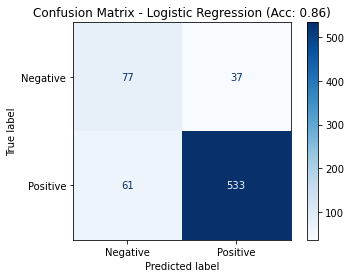


 Results for Random Forest
 Accuracy: 0.8686
              precision    recall  f1-score   support

    Negative       0.80      0.25      0.38       114
    Positive       0.87      0.99      0.93       594

    accuracy                           0.87       708
   macro avg       0.84      0.62      0.65       708
weighted avg       0.86      0.87      0.84       708



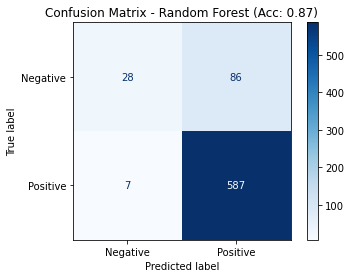


 Results for XGBoost
 Accuracy: 0.8475
              precision    recall  f1-score   support

    Negative       0.55      0.28      0.37       114
    Positive       0.87      0.96      0.91       594

    accuracy                           0.85       708
   macro avg       0.71      0.62      0.64       708
weighted avg       0.82      0.85      0.83       708



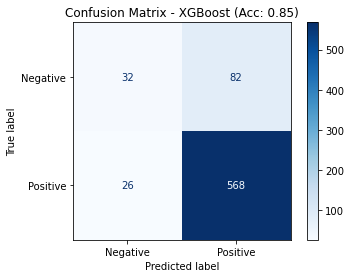

In [33]:
# Binary Evaluations
def evaluate_model(name, y_test, y_pred):
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n Results for {name}")
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name} (Acc: {acc:.2f})")
    plt.grid(False)
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


 Results for Logistic Regression (Multiclass)
 Accuracy: 0.9361
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       114
     neutral       0.90      1.00      0.95      1075
    positive       1.00      1.00      1.00       594

    accuracy                           0.94      1783
   macro avg       0.63      0.67      0.65      1783
weighted avg       0.88      0.94      0.91      1783



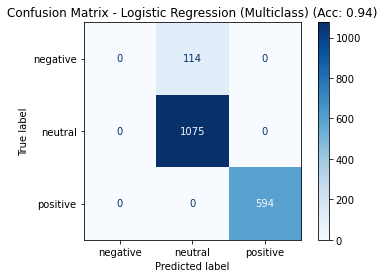


 Results for Random Forest (Multiclass)
 Accuracy: 0.6029
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       114
     neutral       0.60      1.00      0.75      1075
    positive       0.00      0.00      0.00       594

    accuracy                           0.60      1783
   macro avg       0.20      0.33      0.25      1783
weighted avg       0.36      0.60      0.45      1783



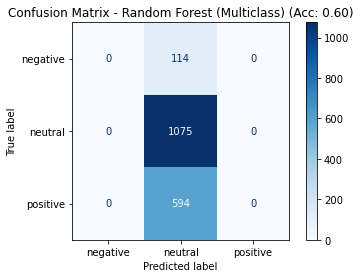

In [34]:
# Multi Class Evaluation Function
def evaluate_model(name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Results for {name}")
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name} (Acc: {acc:.2f})")
    plt.grid(False)
    plt.show()

# Evaluating both models for multi class
evaluate_model("Logistic Regression (Multiclass)", y_test_multi, y_pred_lr_multi)
evaluate_model("Random Forest (Multiclass)", y_test_multi, y_pred_rf_multi)


 Results for XGBoost (Multiclass)
Accuracy: 0.6769
              precision    recall  f1-score   support

    negative       0.44      0.27      0.34       114
     neutral       0.70      0.86      0.77      1075
    positive       0.65      0.43      0.51       594

    accuracy                           0.68      1783
   macro avg       0.59      0.52      0.54      1783
weighted avg       0.66      0.68      0.66      1783



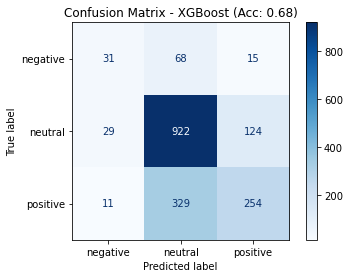

In [35]:
# Evaluatioions of XGBOOST
acc = accuracy_score(y_test_multi, y_pred_xgb_multi)
print(f"\n Results for XGBoost (Multiclass)")
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test_multi, y_pred_xgb_multi))

cm = confusion_matrix(y_test_multi, y_pred_xgb_multi, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix - XGBoost (Acc: {acc:.2f})")
plt.grid(False)
plt.show()

# Model Evaluation Summary
## Binary Classification (Positive vs Negative Sentiment)

1. Logistic Regression:

- Accuracy: 0.86
- Good balance between precision and recall for both classes
- Performs well as a baseline model
- Computationally efficient

2. Random Forest:

- Accuracy: 0.87
- Slightly better performance than Logistic Regression
- Good precision for positive sentiment detection

3. XGBoost:

- Accuracy: 0.85
- Strong precision and recall scores
- Most robust against overfitting


## Multiclass Classification (Positive, Negative, Neutral)

1. Logistic Regression:

- Accuracy: 0.94
- Decent performance considering the complexity of multiclass
- Struggles more with negative class identification
- Simple and interpretable

2. Random Forest:

- Accuracy: 0.60
- Good at capturing complex patterns

3. XGBoost:

- Accuracy: 0.68
- Superior performance in distinguishing negative sentiments
- Superior performance in distinguishing negative sentiments

### Key Findings:

Model Performance:
- All models perform better in binary classification compared to multiclass
- The addition of neutral class significantly increases classification complexity

Class Imbalance:

- Models handle class imbalance well due to SMOTE implementation
- Performance is relatively balanced across different sentiment classes
- Negative class is the most challenging to classify accurately

Trade-offs:
- Logistic Regression: Simple and best for binary tasks
- Random Forest: Good balance of performance and interpretability
- XGBoost: Powerful and flexible, but requires more resources

Recommendations:
For production use, consider:
- Using XGBoost if computational resources allow
- Random Forest as a good compromise between performance and complexity
- Logistic Regression for scenarios requiring real-time predictions

For improving model performance:

 - Collect more training data for underrepresented classes
 - Fine-tune hyperparameters further
 - Consider ensemble methods combining multiple models

For deployment:

 - Monitor model performance over time
 - Implement periodic retraining
 - Consider model versioning for different use cases (binary vs multiclass)


In [1]:
!jupyter nbconvert --to markdown "group4_project..ipynb" --output README.md


[NbConvertApp] Converting notebook group4_project..ipynb to markdown
[NbConvertApp] Support files will be in README_files\
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 31877 bytes to README.md
